# Syntax for specify sizing relationships

In [16]:
from compute import Var, Par
from datastructures.api import Model, adda

In [17]:
m = Var('m', unit='kg')
# no need to specify values for variables declared with Var
# if specified it will be treated as a guessing variable for solver
# unit field can also be left empty
g = Par('g', 9.81, unit='m/s^2')

We store all sizing relationships in a Model object

In [20]:
model = Model()
# model.root is used to access the nesting level
F = adda(model.root, 'F', m*g); F

F

Note that if we update the value of m, the value of F does not change automatically; think of variables as temporary storage. This means that we could have out of synch information like below, if we manually set the value of F.

In [21]:
F.varval = 20; F

F

# Data structure for storing the formulation

In [39]:
from datastructures.api import addf, addsolver, setsolvefor

In [40]:
model = Model()
m = model.root
Pbus = Var('P_{bus}')
A = Var('A', 0.5)
solver = addsolver(m)
Pcomms = adda(solver, 'P_{comms}', 483.3*A-Pbus)
addf(solver, Pbus-10*Pcomms**0.5)
setsolvefor(solver, [Pbus]) 
h = Var('h', 400e3)
D = Var('D', 0.1)
R = adda(m, 'R', Pcomms*D**2/h**2*1e18/(8e6))
C = adda(m, 'C', 2500*D**2+12000*(A+1)+100*Pbus);

Once we have built a model through the syntax above we can recover the structure of the model and the nested formulation as follows:

In [41]:
edges, tree = model.generate_formulation()

### Input edges:

In [42]:
edges[0]

{0: ('A', 'P_{bus}'),
 1: ('P_{comms}', 'P_{bus}'),
 2: ('D', 'P_{comms}', 'h'),
 3: ('A', 'D', 'P_{bus}')}

### Output edges:

In [43]:
edges[1]

{0: ('P_{comms}',), 1: (None,), 2: ('R',), 3: ('C',)}

### Component tree (ordered)

In [44]:
tree[0]

OrderedDict([(0, 2), (1, 2), (2, 1), (3, 1)])

### Solver tree (unordered)
Order is determined based on order of component

In [45]:
tree[1]

{2: 1}

### Variable tree (unordered)
Order is determined based on order of component

In [46]:
tree[2]

{'P_{bus}': 2}

# Visualizing the hierarchical structure matrix

In [47]:
from datastructures.rendering import render_incidence

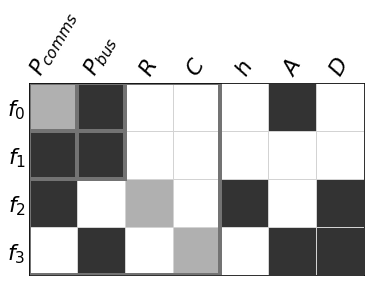

In [49]:
render_incidence(edges, tree, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);

Order visualized in HSM is based on order in which sizing relationships were added
this can be modified by changing the tree. Below we flip $f_2$ and $f_3$ in the matrix

In [58]:
new_tree = {0:2,1:2,3:1,2:1},tree[1],tree[2]

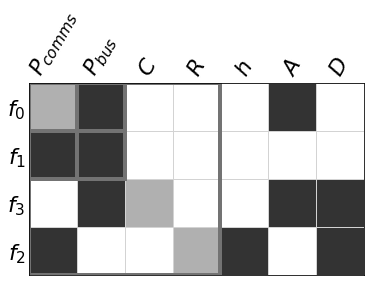

In [59]:
render_incidence(edges, new_tree, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);